In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None
from IPython.core.display import HTML; HTML(open("custom.html", "r").read())

# Chapter 0: Introduction 


<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;This script introduces <code>numpy</code>, <code>pandas</code> and <code>matplotlib</code> and <code>seaborn</code> as far as we use it in the following course. 


Thus it is not a comprehensive introduction to these libraries !
    </div>

## pandas

`pandas` allows handling tabular data as so called `DataFrame`s. Tabular data means that columns have types. Within a colum values are of the same type, but types can differ between columns.

### Some basics

In [2]:
# show content of csv file, only works in notebook:
!cat example.csv

a,b,c
0,0.0,one
1,1.1,two
4,4.4,thee
9,9.9,four
16,17.6,five
25,27.500000000000004,one
36,39.6,two


In [3]:
# read file with pandas

import pandas as pd

df = pd.read_csv("example.csv")
df

,a,b,c
0,0,0.0,one
1,1,1.1,two
2,4,4.4,thee
3,9,9.9,four
4,16,17.6,five
5,25,27.5,one
6,36,39.6,two


<div class="alert alert-block alert-info">
<i class="fa fa-warning"></i>&nbsp;<code>pandas</code> also 
supports reading and writing of other file formats, like <code>.xlsx</code>, <code>.hdf5</code> or <code>sqlite3</code> files.
</div>





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
a    7 non-null int64
b    7 non-null float64
c    7 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


You can see that the colums `a`, `b` and `c` have different types `int64`, `float64` and `object`. The latter can be read as "anything but a number".

In [5]:
df.shape

(7, 3)

The `.shape` is numbers of rows times number of columns.

To show the first 5 rows of a data frame we can use `.head()`.

In [6]:
df.head()

,a,b,c
0,0,0.0,one
1,1,1.1,two
2,4,4.4,thee
3,9,9.9,four
4,16,17.6,five


And `.tail()` shows the last 5 rows:

In [7]:
df.tail()

,a,b,c
2,4,4.4,thee
3,9,9.9,four
4,16,17.6,five
5,25,27.5,one
6,36,39.6,two


Both accept an integer to change the number of rows to show:

In [8]:
df.head(3)

,a,b,c
0,0,0.0,one
1,1,1.1,two
2,4,4.4,thee


Compute some statistics on the rows

In [9]:
df.describe()

,a,b
count,7.000000,7.000000
mean,13.000000,14.300000
std,13.490738,14.839811
min,0.000000,0.000000
25%,2.500000,2.750000
50%,9.000000,9.900000
75%,20.500000,22.550000
max,36.000000,39.600000


###  Accessing parts of a data frame

We can access separate columns using a column name:

In [10]:
df["a"]

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: a, dtype: int64

Single columns are `Series` in `pandas`:

In [11]:
type(df['a'])

pandas.core.series.Series

In [12]:
scores = df["a"] + 2 * df["b"]
print(scores)

0      0.0
1      3.2
2     12.8
3     28.8
4     51.2
5     80.0
6    115.2
dtype: float64


<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;Don't forget that
    <ul>
        <li> Indexing in Python starts with <code>0</code>
        </li>
        <li> Upper limits are exclusive
            </li>
        <li> Negative indices start from the right end, <code>-1</code> is the last element, <code>-2</code> the one before, etc.</li>
        <li> <code>:</code> refers to all elements.</li>
    </ul>
</div>




`df.iloc[row_slice, col_slice]` offers index based access:

In [13]:
df.iloc[:, 0]

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: a, dtype: int64



To extract rows `1` to `2` (included), and all columns up to the last one:

In [14]:
df.iloc[1:3, :-1]

,a,b
1,1,1.1
2,4,4.4


To extract the last column:

In [15]:
df.iloc[1:3, -1]

1     two
2    thee
Name: c, dtype: object

### Filtering a data frame

In [16]:
df[df["a"] < 10]

,a,b,c
0,0,0.0,one
1,1,1.1,two
2,4,4.4,thee
3,9,9.9,four


This works as follows:

In [17]:
flags = df["a"] > 3
flags

0    False
1    False
2     True
3     True
4     True
5     True
6     True
Name: a, dtype: bool

In [18]:
df[flags]

,a,b,c
2,4,4.4,thee
3,9,9.9,four
4,16,17.6,five
5,25,27.5,one
6,36,39.6,two


Another example:

In [19]:
df[df["c"] == "one"]

,a,b,c
0,0,0.0,one
5,25,27.5,one


### Extending a dataframe

Adding a new, computed column:

In [20]:
# values in new column d will be values from "a" squared:
df["d"] = df["a"] ** 2

df.head()

,a,b,c,d
0,0,0.0,one,0
1,1,1.1,two,1
2,4,4.4,thee,16
3,9,9.9,four,81
4,16,17.6,five,256


We can also overwrite a column, here we use `apply` to apply the same function on all values in the given column:

In [21]:
def increment(v):
    return v + 1

df["d"] = df["d"].apply(increment)

df.head()

,a,b,c,d
0,0,0.0,one,1
1,1,1.1,two,2
2,4,4.4,thee,17
3,9,9.9,four,82
4,16,17.6,five,257


## numpy

`numpy` offers data structures from linear algebra, e.g. vectors and matrices. 

In contrast to `pd.DataFrame` matrices contain numbers of the same type.

In [22]:
import numpy as np

x = np.array([1.0, 2.0, 3.0])
print(x)

[1. 2. 3.]


In [23]:
print(x.shape)

(3,)


In [24]:
A = np.array([[1.0, 2.0, 3.0],
              [3.0, 4.0, 5.0],
              [3.0, 5.0, 3.0],
             ])
print(A)

[[1. 2. 3.]
 [3. 4. 5.]
 [3. 5. 3.]]


In [25]:
print(A.shape)

(3, 3)


Indexed access works as usual:

In [26]:
print(x[0], x[-1], x[1:])

1.0 3.0 [2. 3.]


In [27]:
print(A[1, 0], A[:, 1])

3.0 [2. 4. 5.]


Numpy offers element-wise function application:

In [28]:
# caveat ! not matrix-matrix multiplication
A * A

array([[ 1.,  4.,  9.],
       [ 9., 16., 25.],
       [ 9., 25.,  9.]])

In [29]:
# this is matrix-matrix multiplication:
A @ A

array([[16., 25., 22.],
       [30., 47., 44.],
       [27., 41., 43.]])

In [30]:
A - 3

array([[-2., -1.,  0.],
       [ 0.,  1.,  2.],
       [ 0.,  2.,  0.]])

In [31]:
np.abs(A - 3)

array([[2., 1., 0.],
       [0., 1., 2.],
       [0., 2., 0.]])

In [32]:
x = np.linspace(0, np.pi, 10)
print(x)
print(len(x))

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]
10


In [33]:
x < 2

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False])

In computations like addition `True` is handled as `1` and `False` as `0`. 

In [34]:
p = np.sum(x < 2)
print(p)
print(p / len(x) * 100, "percent of entries in x are smaller than 2")

6
60.0 percent of entries in x are smaller than 2


## About plotting

We use `matplotlib` and also `seaborn` in the script. `seaboarn` is a layer ontop of `matplotlib` offering some easy-to-use standard plots and also a more modern layout and styling.

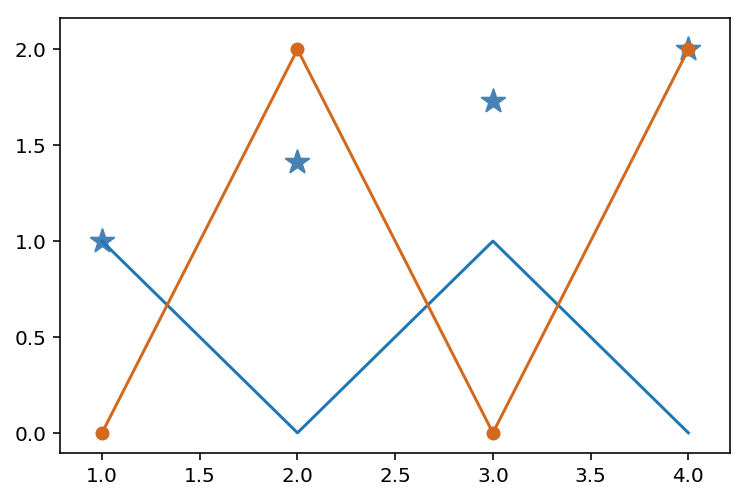

In [35]:
import matplotlib.pyplot as plt

x = np.linspace(1, 4, 4)
y0 = np.mod(x, 2)
y1 = 2 * (1 - y0)
y2 = np.sqrt(x)

plt.plot(x, y0)  # default color is blue
plt.plot(x, y1, color="chocolate", marker="o")

# no lines, marker size is 150:
plt.scatter(x, y2, color="steelblue", marker="*", s=150);

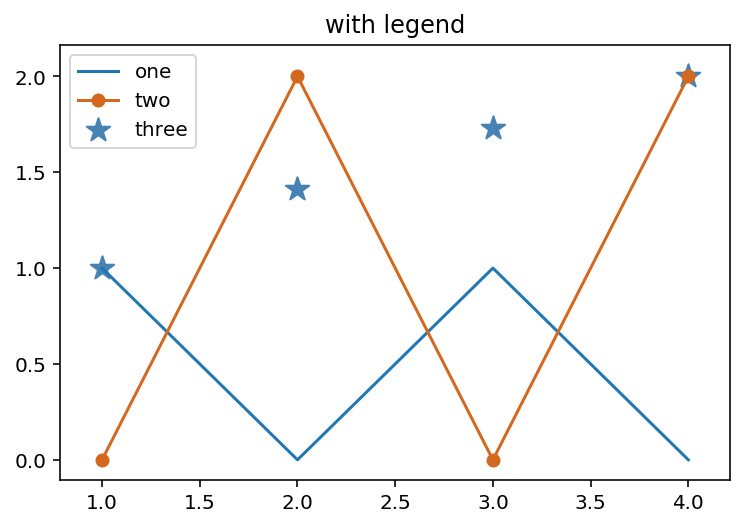

In [36]:
plt.plot(x, y0, label="one")
plt.plot(x, y1, color="chocolate", marker="o", label="two")

# no lines, marker size is 150:
plt.scatter(x, y2, color="steelblue", marker="*", s=150, label="three")

plt.legend()
plt.title("with legend");

After `plt.subplot(m, n, i)` the following plot will paint into cell `i` in a `m` times `n` grid of plots. `m` is the number of rows, `n` is the number of columns and `i` is counted row wise:

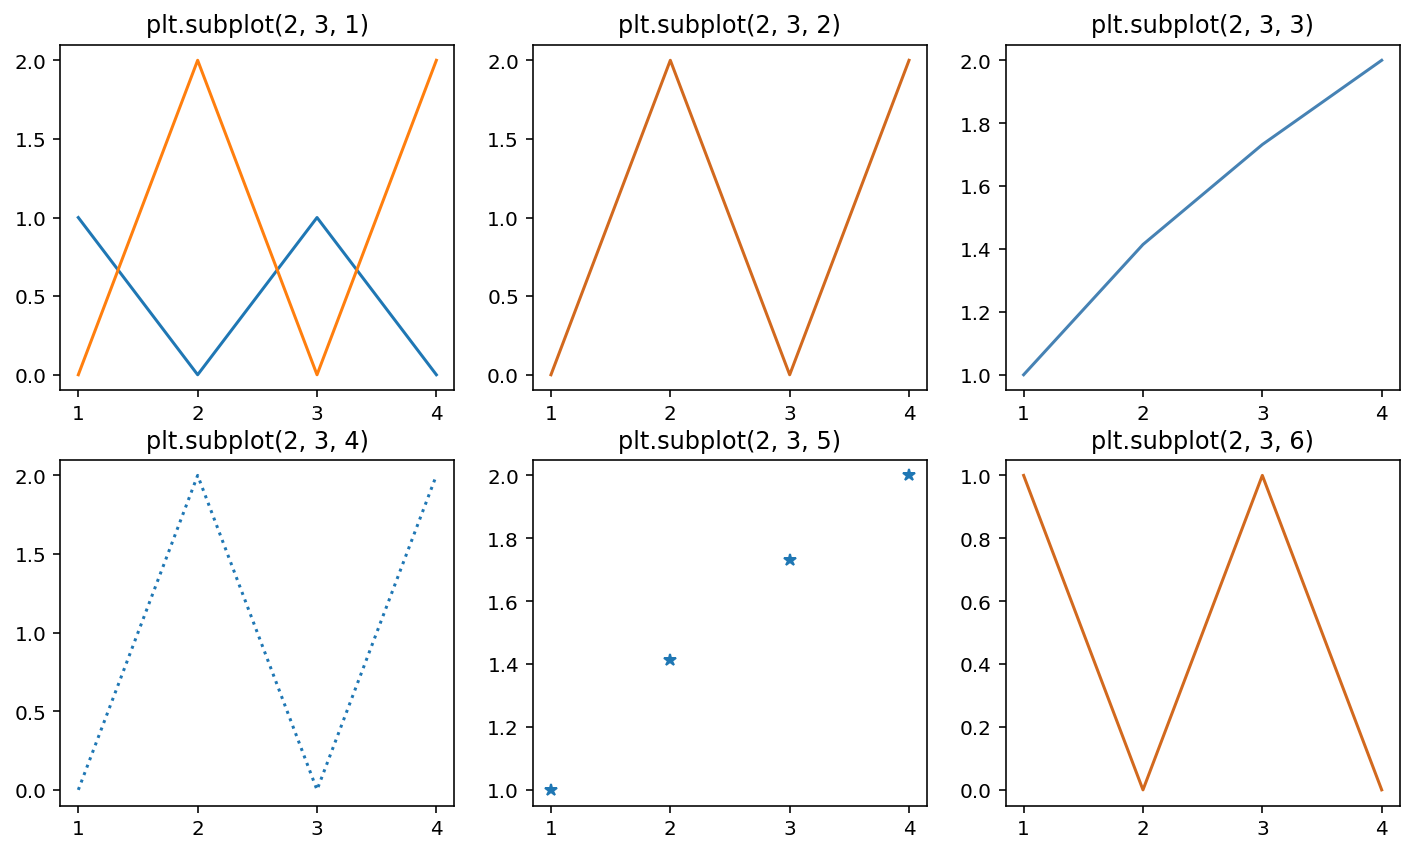

In [37]:
# multiple plots
  
plt.figure(figsize=(12, 7))  # width, height

plt.subplot(2, 3, 1)
plt.plot(x, y0)
plt.plot(x, y1)
plt.title("plt.subplot(2, 3, 1)")

plt.subplot(2, 3, 2)
plt.plot(x, y1, "chocolate")
plt.title("plt.subplot(2, 3, 2)")

plt.subplot(2, 3, 3)
plt.plot(x, y2, "steelblue")
plt.title("plt.subplot(2, 3, 3)")

plt.subplot(2, 3, 4)
plt.plot(x, y1, ":")
plt.title("plt.subplot(2, 3, 4)")

plt.subplot(2, 3, 5)
plt.plot(x, y2, "*")
plt.title("plt.subplot(2, 3, 5)")

plt.subplot(2, 3, 6)
plt.plot(x, y0, "chocolate")
plt.title("plt.subplot(2, 3, 6)");

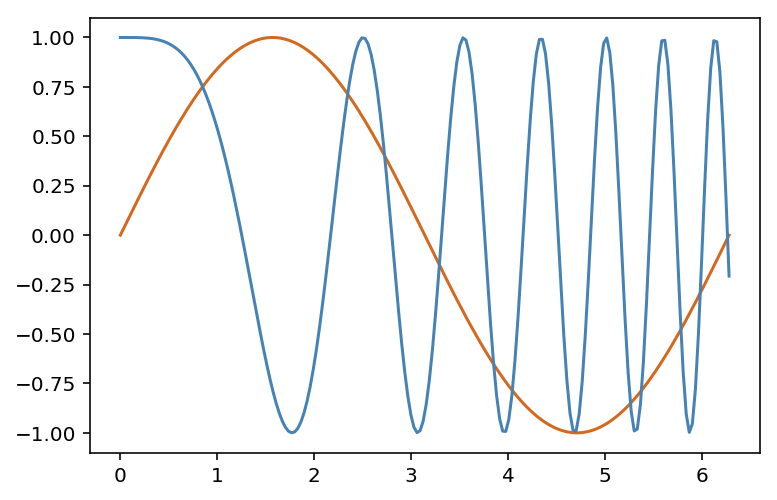

In [38]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)
z = np.cos(x ** 2)

plt.plot(x, y, "chocolate")
plt.plot(x, z, "steelblue");

# Exercise section

1. Repeat the examples above and play with them

# * Optional Exercse

2. Can you plot a circle by computing `x` and `y` vectors suitable for `plt.plot` ? Make sure that the circle looks like a circle and not like an ellipse.

3. Plot three cricles with different radii and different colors, create labels and plot a legend. Make sure that the legend shows up in the top-right corner and does not overlap with the circles.

4. Plot the three circles in 3 different plots in one row using `plt.subplot`.


Text(0.5, 1.0, 'circle')

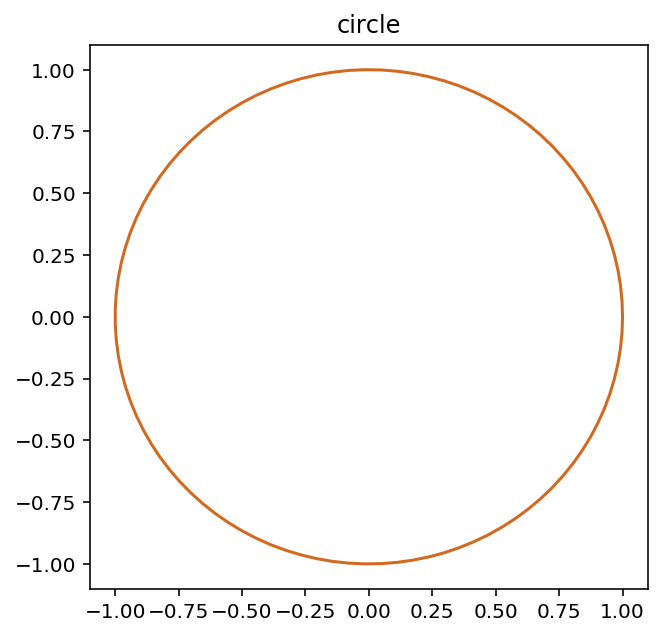

In [39]:
#SOLUTION FOR 2
import numpy as np
import matplotlib.pyplot as plt


rad = np.linspace(0, 2 * np.pi, 100)

r = 1
x = r * np.cos(rad)
y = r * np.sin(rad)

plt.figure(figsize=(5, 5))
plt.plot(x, y, color="chocolate")
plt.title("circle")

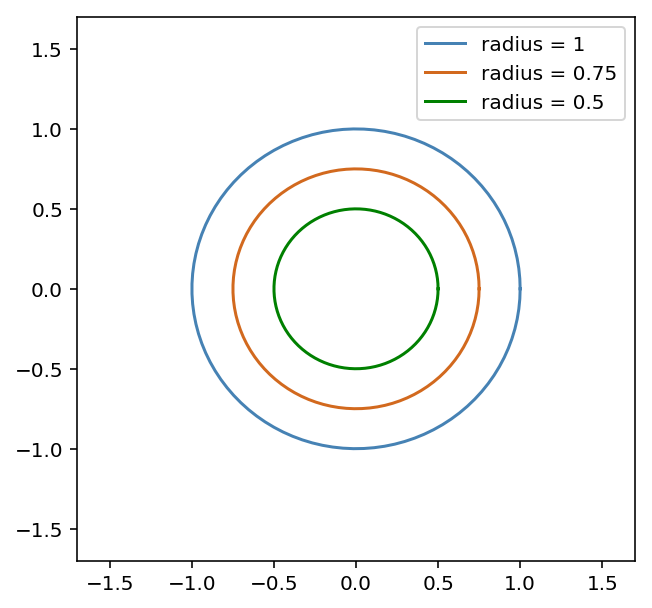

In [40]:
# SOLUTION FOR 3

import numpy as np
import matplotlib.pyplot as plt


rad = np.linspace(0, 2 * np.pi, 100)

r = 1

def circle(r, color):
    x = r * np.cos(rad)
    y = r * np.sin(rad)

   
    plt.plot(x, y, color=color, label="radius = {}".format(r))
    
plt.figure(figsize=(5, 5))


circle(1, "steelblue")
circle(.75, "chocolate")
circle(.5, "green")
plt.legend(loc="upper right");
plt.xlim([-1.7, 1.7])
plt.ylim([-1.7, 1.7]);

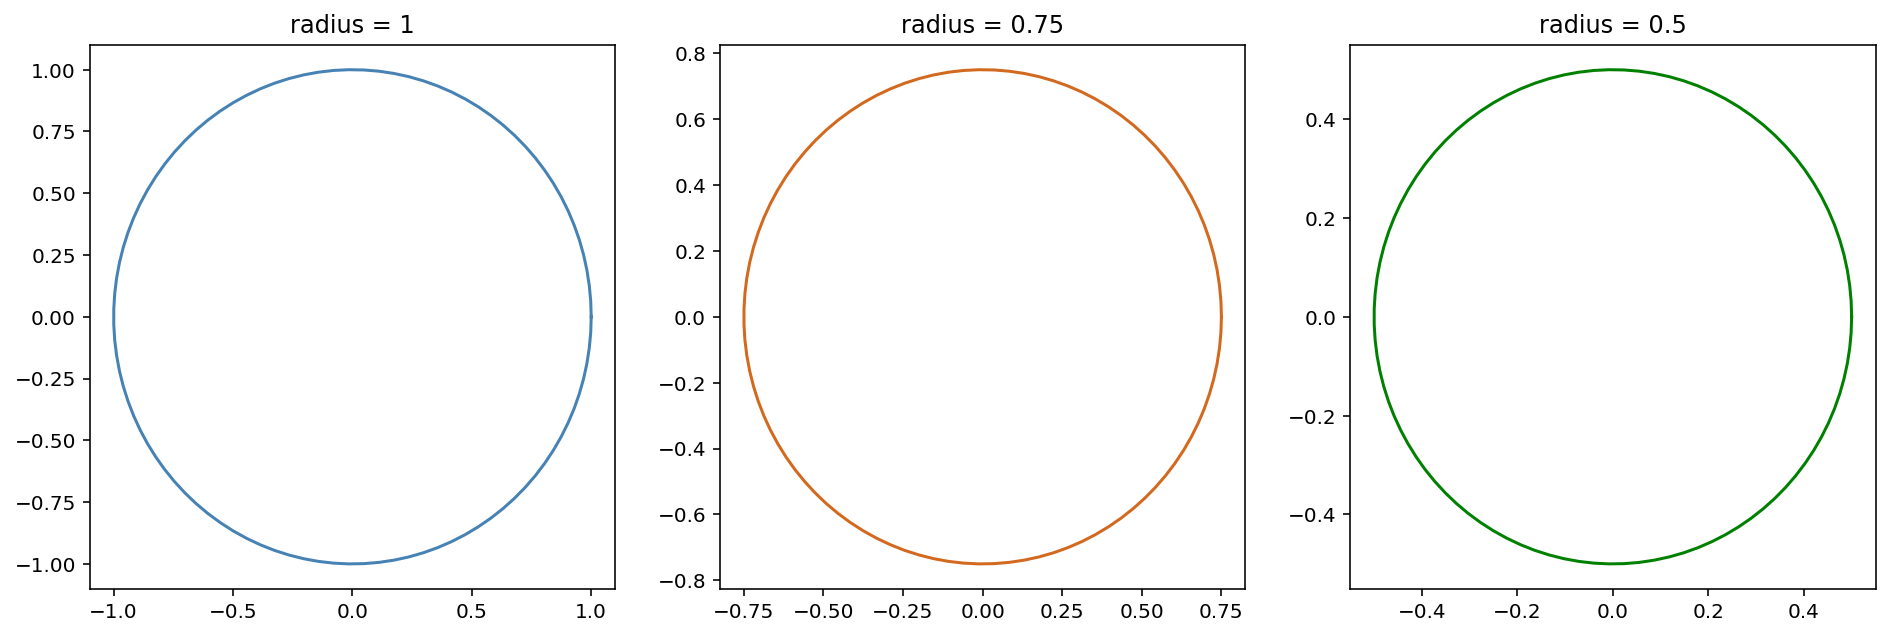

In [41]:
# SOLUTION FOR 3

import numpy as np
import matplotlib.pyplot as plt


rad = np.linspace(0, 2 * np.pi, 100)

r = 1

def circle(r, color, i, n):
    x = r * np.cos(rad)
    y = r * np.sin(rad)

    plt.subplot(1, n, i)
    plt.plot(x, y, color=color)
    plt.title("radius = {}".format(r))
    
plt.figure(figsize=(16, 5))


circle(1, "steelblue", 1, 3)
circle(.75, "chocolate", 2, 3)
circle(.5, "green", 3, 3)
